# Problem Statement - Suicide Rate Analysis

Context
Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

Objective
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.


Data Dictionary
We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

country: Country

year: Year

sex: Sex (male or female)

age: Suicide age range, ages divided into six categories

suicides_no: number of suicides

population: population of that sex, in that age range, in that country, and in that year

suicides/100k pop: Number of suicides per 100k population

gdp_for_year($): GDP of the country in that year in dollars

gdp_per_capita($): Ratio of the country’s GDP and its population

generation: Generation of the suicides in question, being possible 6 different categories


Questions to explore
Is the suicide rate more prominent in some age categories than others?
Which countries have the most and the least number of suicides?
What is the effect of the population on suicide rates?
What is the effect of the GDP of a country on suicide rates?
What is the trend of suicide rates across all the years?
Is there a difference between the suicide rates of men and women?
 

---

Prepare programming environment and import data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mydata_raw = pd.read_csv('master.csv')
mydata = mydata_raw.copy()          # creating a copy for contingency 


---

# Data Transformation 

In [11]:
mydata.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [19]:
mydata = mydata.drop(['HDI for year','country-year'],axis = 1) #removing unwated fields 

In [22]:
mydata.shape

(27820, 10)

In [21]:
mydata.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [28]:
# renaming data columns 
mydata.columns = ('country','year','sex','age','suicides_no','population','suicides_per_100k','gdp_for_year','gdp_per_capita','generation')

In [29]:
mydata.head()


,country,year,sex,age,suicides_no,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [30]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_per_100k  27820 non-null  float64
 7   gdp_for_year       27820 non-null  object 
 8   gdp_per_capita     27820 non-null  int64  
 9   generation         27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [46]:
# removing commas from the 'population' field
mydata['gdp_for_year']= mydata['gdp_for_year'].replace(',','', regex = True)   # this removes the comma in the field
mydata.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [58]:
# Changing the data type for the poulation field 
mydata['gdp_for_year']= mydata['gdp_for_year'].astype(float)
mydata['year']= mydata['year'].astype(str)

In [59]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  object 
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_per_100k  27820 non-null  float64
 7   gdp_for_year       27820 non-null  float64
 8   gdp_per_capita     27820 non-null  int64  
 9   generation         27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [60]:
mydata.describe().T       # summary of numeric fileds 

,count,mean,std,min,25%,50%,75%,max
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.0,3.000000e+00,2.500000e+01,1.310000e+02,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.0,9.749850e+04,4.301500e+05,1.486143e+06,4.380521e+07
suicides_per_100k,27820.0,1.281610e+01,1.896151e+01,0.0,9.200000e-01,5.990000e+00,1.662000e+01,2.249700e+02
gdp_for_year,27820.0,4.455810e+11,1.453610e+12,46919625.0,8.985353e+09,4.811469e+10,2.602024e+11,1.812071e+13
gdp_per_capita,27820.0,1.686646e+04,1.888758e+04,251.0,3.447000e+03,9.372000e+03,2.487400e+04,1.263520e+05


---

# Univariate Plots for Categorical Fields 

In [85]:
def cat_plot(variable):
    mydata[variable].value_counts().plot(kind='bar', figsize = (15,10))

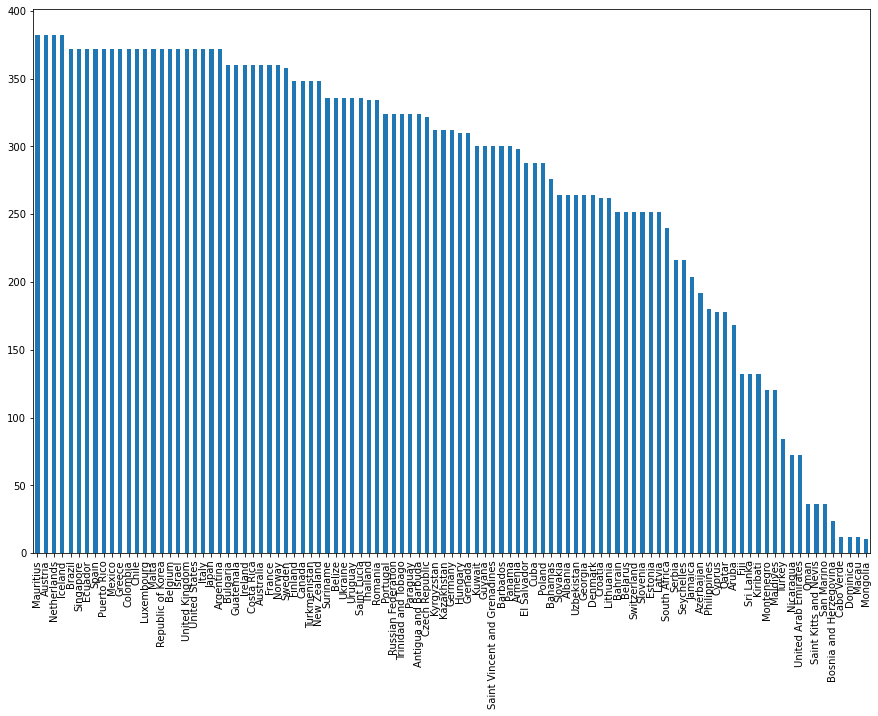

In [87]:
cat_plot( 'country')

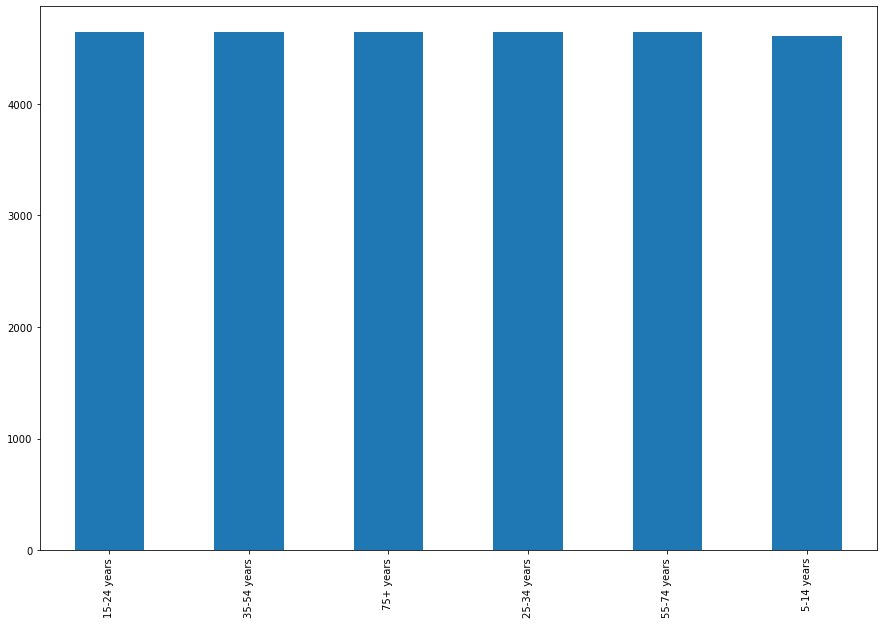

In [116]:
cat_plot(variable = 'age')

In [121]:
# have to check the values because they are look like the equal values from the plot 
mydata.groupby('age')['age'].count()

,age
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


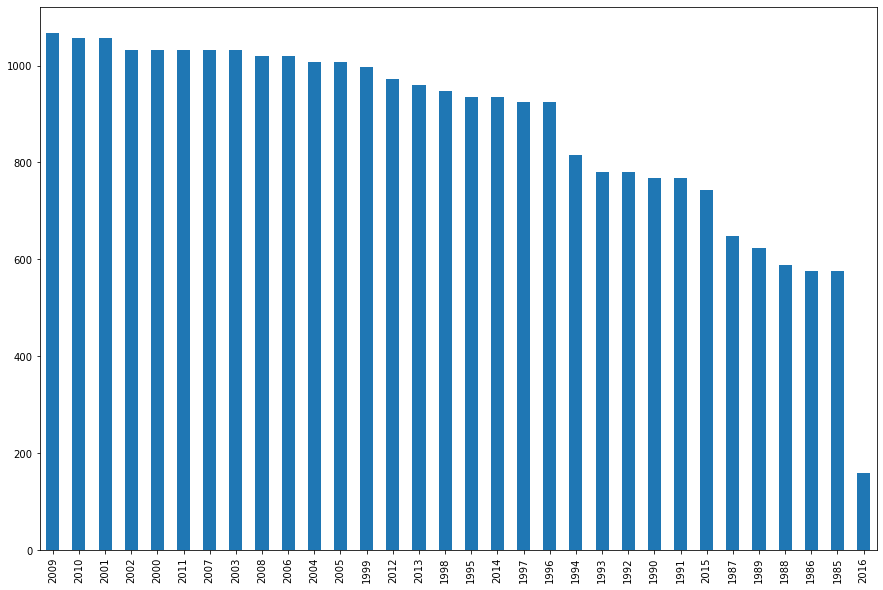

In [117]:
cat_plot(variable = 'year')

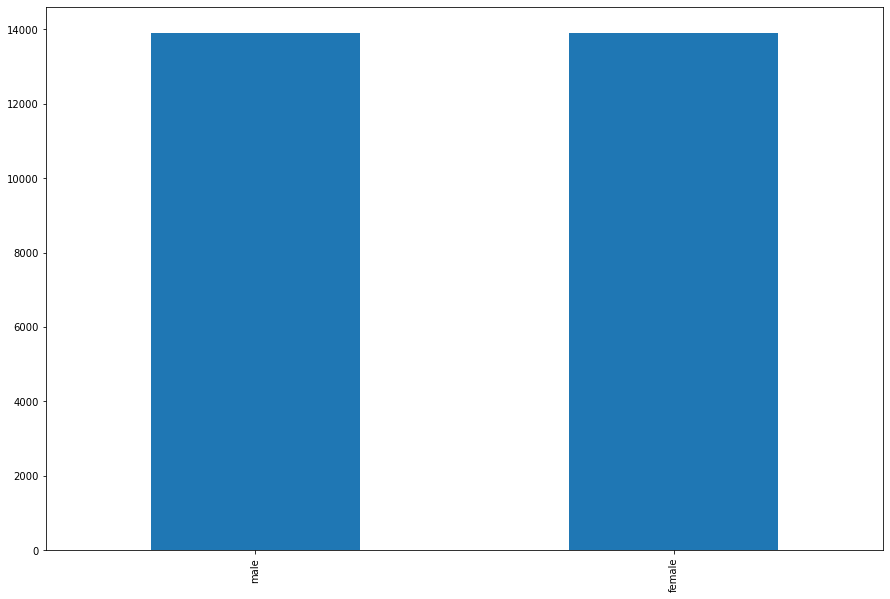

In [118]:
cat_plot(variable = 'sex')

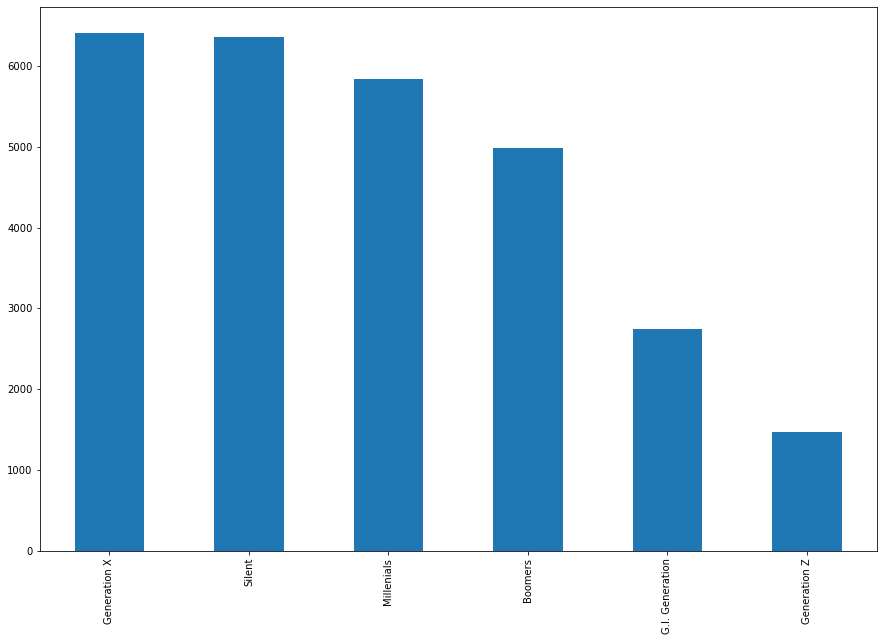

In [119]:
cat_plot(variable = 'generation')

---

# Univariate Plots for numerical Fields 

In [152]:
def num_plot(variable):
    f, axes = plt.subplots(2,1, figsize = (15,15))
    k1 = sns.histplot(mydata[variable], bins = 100, ax = axes[0])
    k2 = sns.boxplot(mydata[variable], ax = axes[1])


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


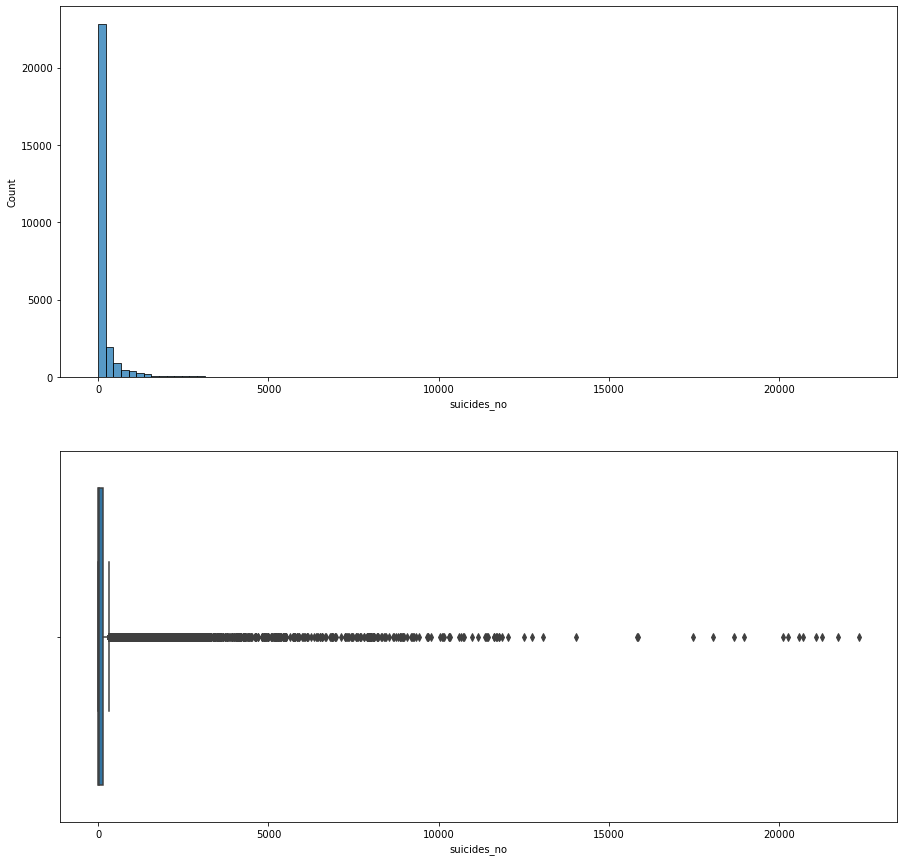

In [190]:
num_plot(variable = 'suicides_no')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


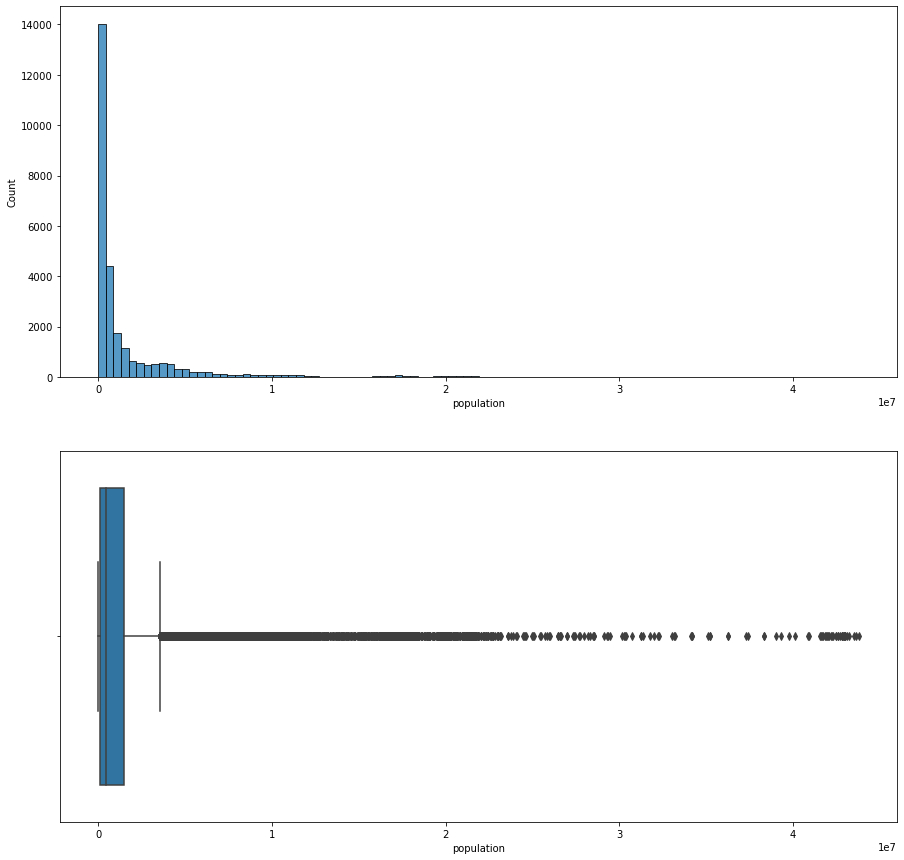

In [153]:
num_plot(variable = 'population')


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


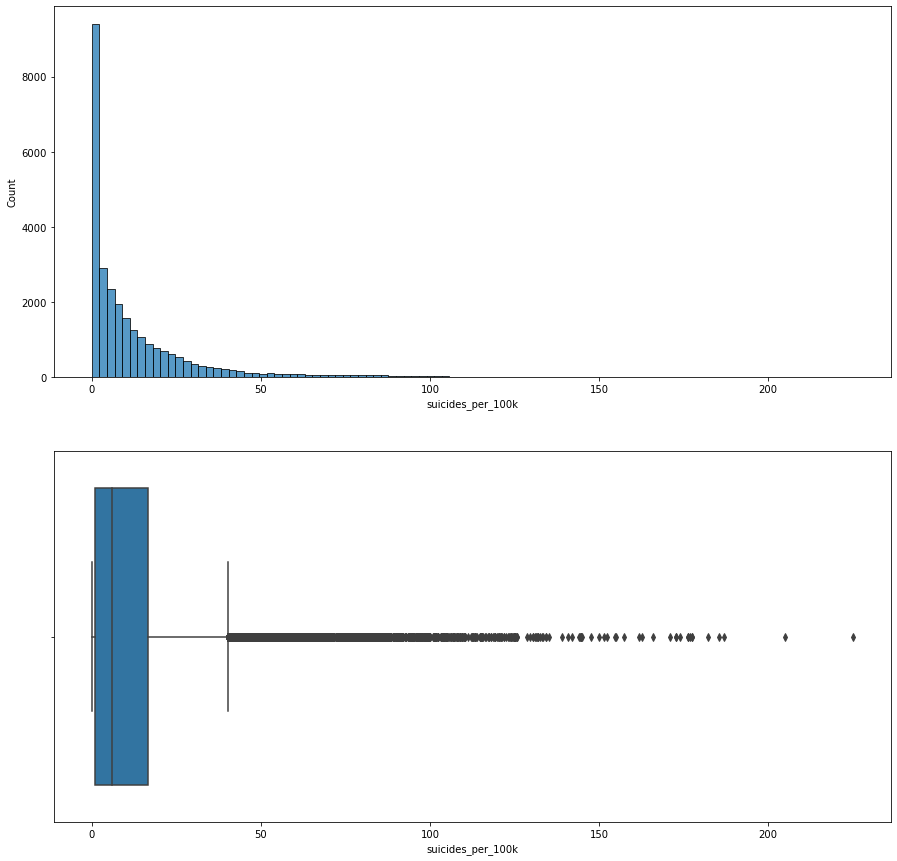

In [154]:
num_plot(variable = 'suicides_per_100k')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


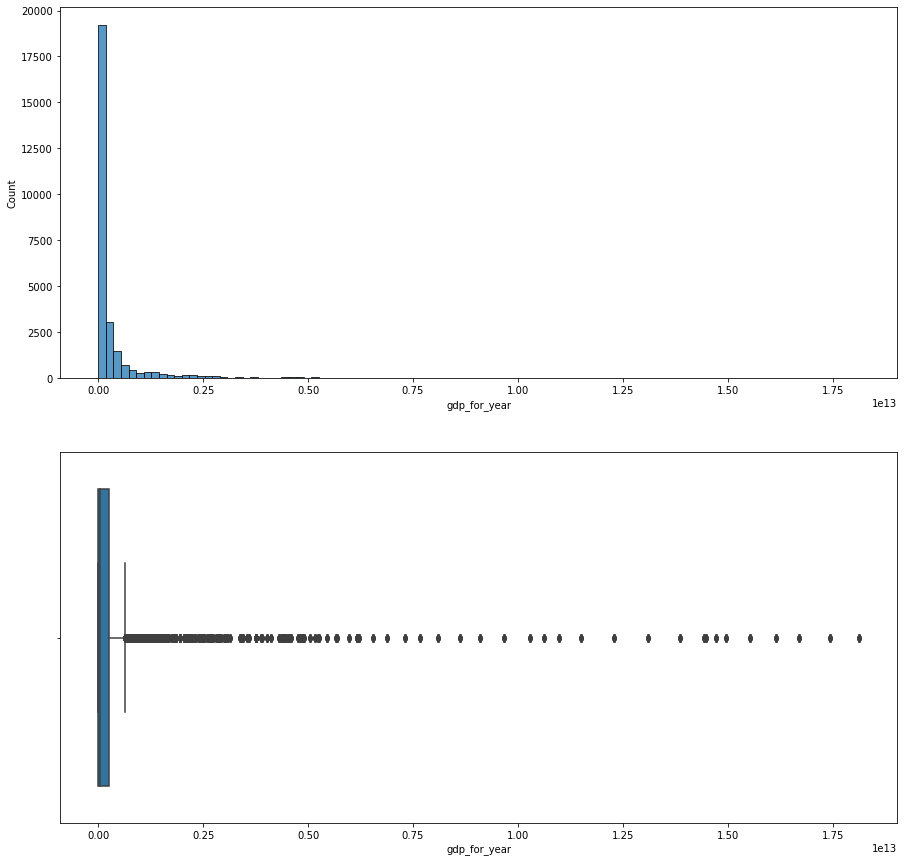

In [155]:
num_plot(variable = 'gdp_for_year')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


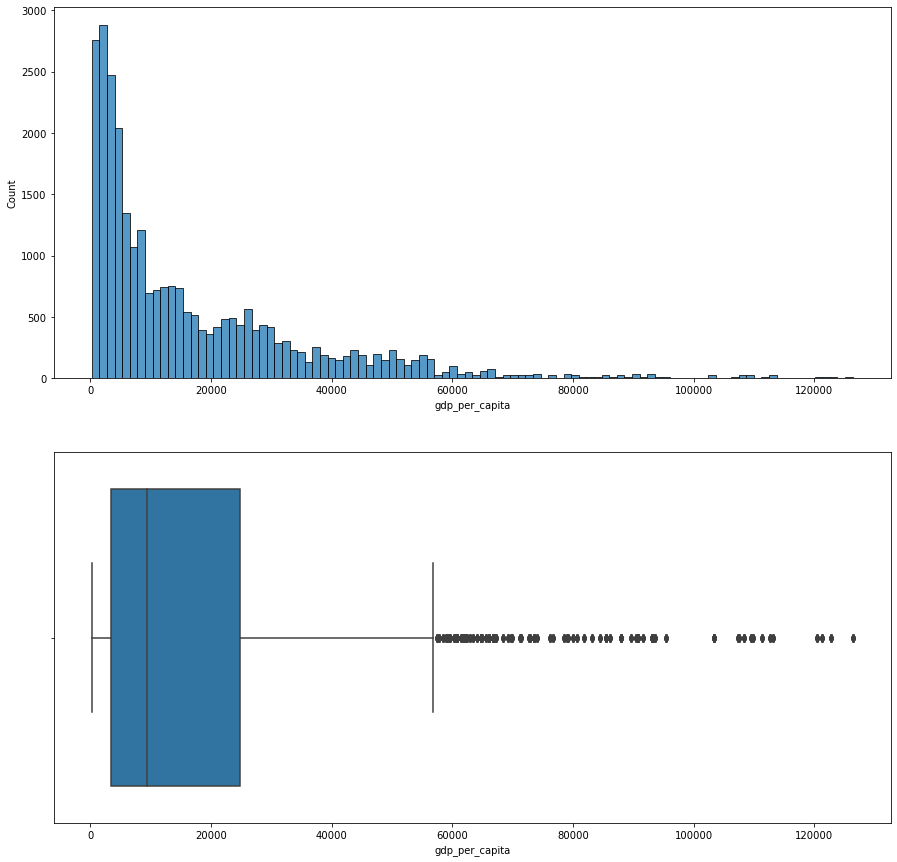

In [158]:
num_plot(variable = 'gdp_per_capita')

# Bivariate Plots: Numerical vs Categorical

In [187]:
def biplot(variable1,variable2):
    f, axes = plt.subplots(3,1, figsize = (15,15))
    k1 = sns.boxplot(data = mydata, y = variable1, x = variable2, ax = axes[0])
    k2= sns.barplot(data = mydata, y = variable1, x = variable2, ax = axes[2])
    k3= sns.stripplot(data = mydata, y = variable1, x = variable2, ax = axes[1], hue = 'sex')

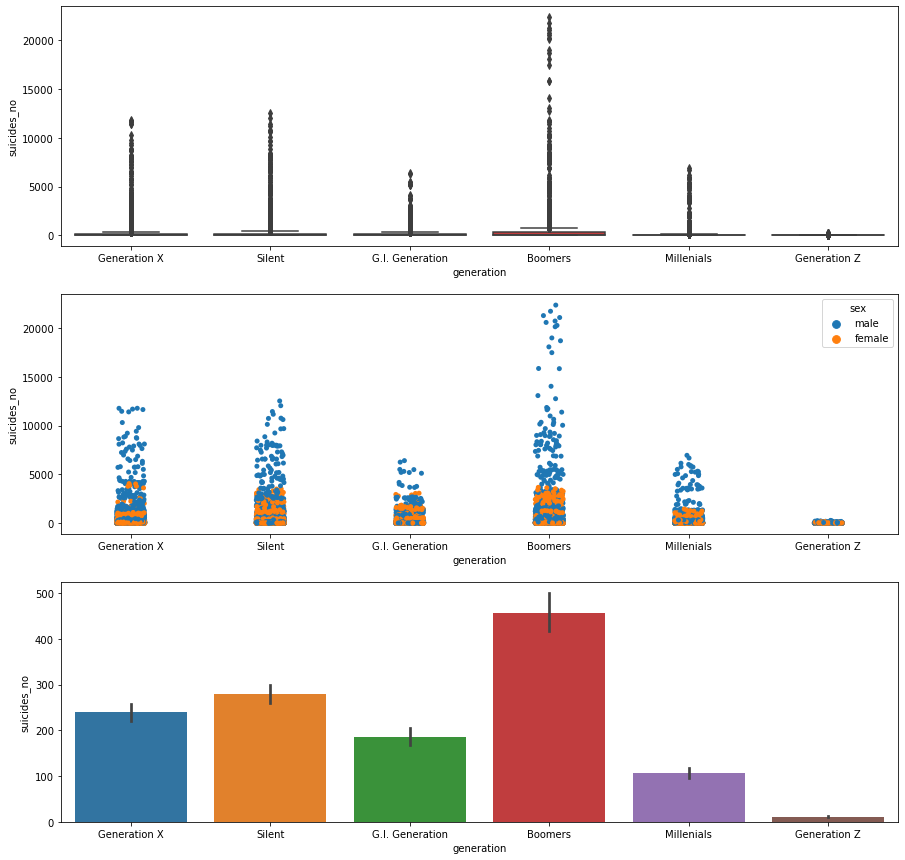

In [188]:
biplot('suicides_no','generation')

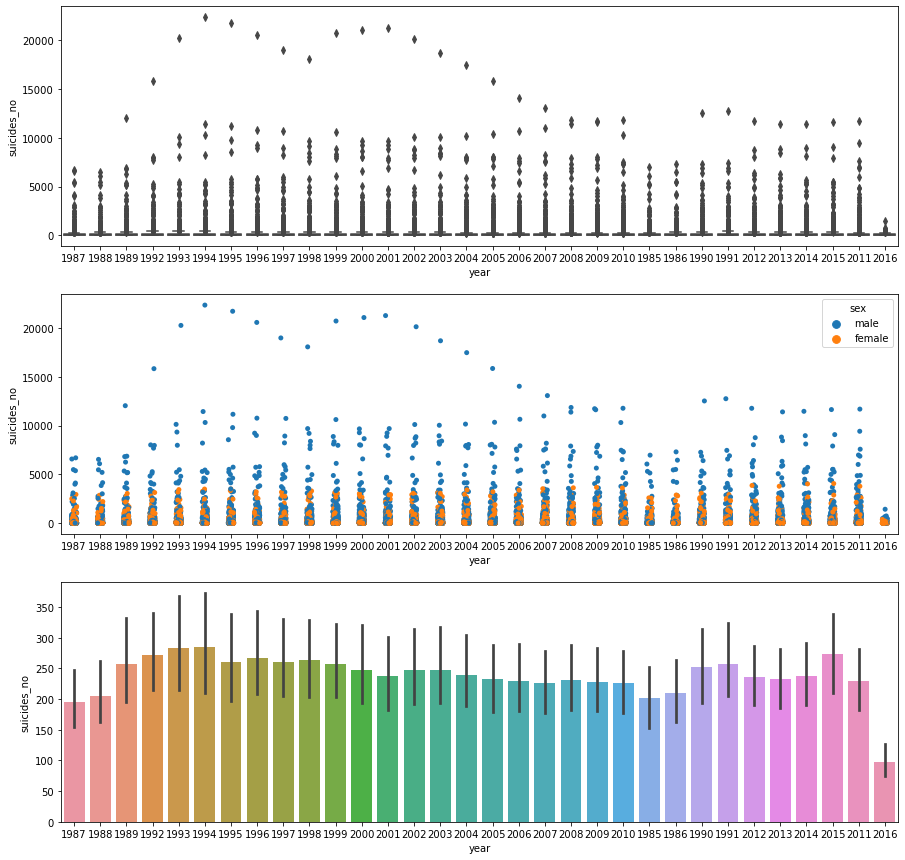

In [230]:
biplot('suicides_no','year')

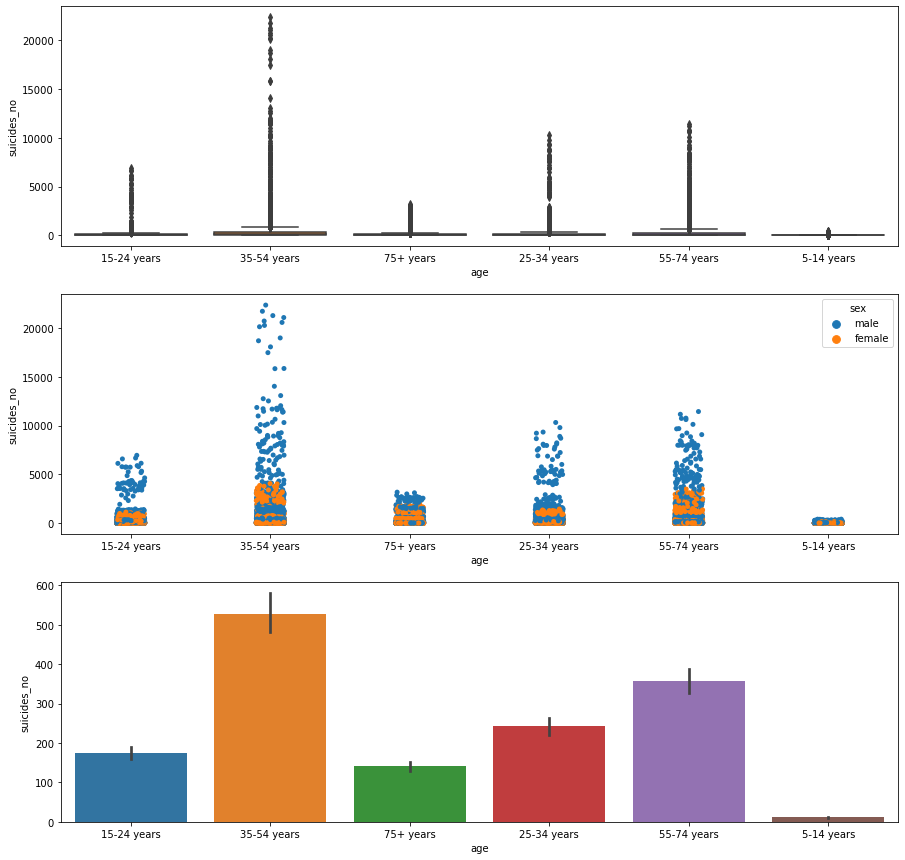

In [231]:
biplot('suicides_no','age')

---

# Bivariate Plots- Numerical vs Numerical 

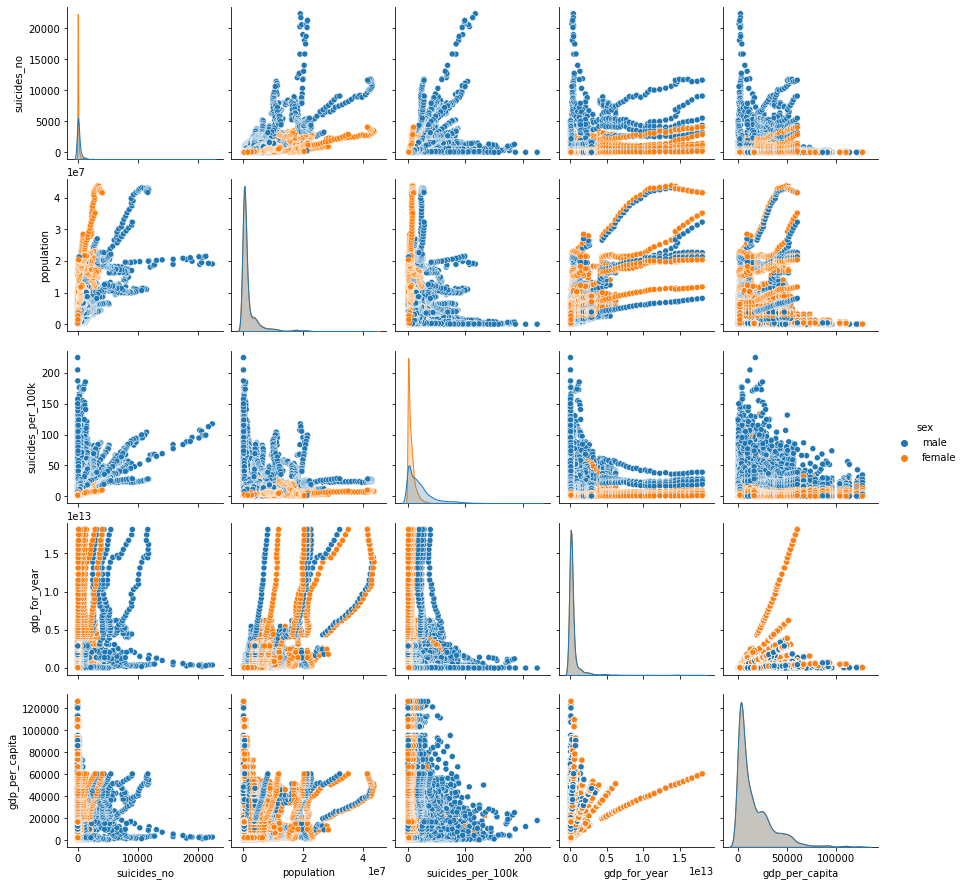

In [189]:
sns.pairplot(mydata, hue = 'sex')
plt.show()

<AxesSubplot:>

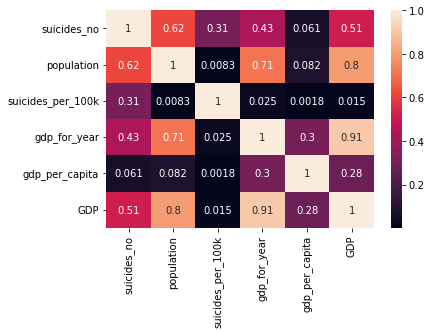

In [297]:
mydata.corr()
sns.heatmap(mydata.corr(), annot= True)


---

# Questions
1. Is the suicide rate more prominent in some age categories than others?
2. Which countries have the most and the least number of suicides?
3. What is the effect of the population on suicide rates?
4. What is the effect of the GDP of a country on suicide rates?
5. What is the trend of suicide rates across all the years?
6. Is there a difference between the suicide rates of men and women?

             suicides_per_100k
age                           
15-24 years           8.947154
25-34 years          12.186885
35-54 years          14.947441
5-14 years            0.620041
55-74 years          16.155579
75+ years            23.955409


<AxesSubplot:xlabel='age'>

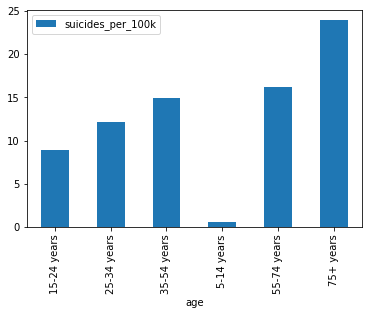

In [236]:
#Question 1 
print(mydata.groupby('age')['suicides_per_100k'].mean().to_frame())
mydata.groupby('age')['suicides_per_100k'].mean().to_frame().plot(kind='bar')

---

In [199]:
#Question 2
countrydata = mydata.groupby('country')['suicides_no'].sum().to_frame()
countrydata

,suicides_no
country,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101
...,...
United Arab Emirates,622
United Kingdom,136805
United States,1034013


In [207]:
print(countrydata[countrydata.suicides_no==countrydata.suicides_no.max()])

                    suicides_no
country                        
Russian Federation      1209742


In [208]:
print(countrydata[countrydata.suicides_no==countrydata.suicides_no.min()])

                       suicides_no
country                           
Dominica                         0
Saint Kitts and Nevis            0


---

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

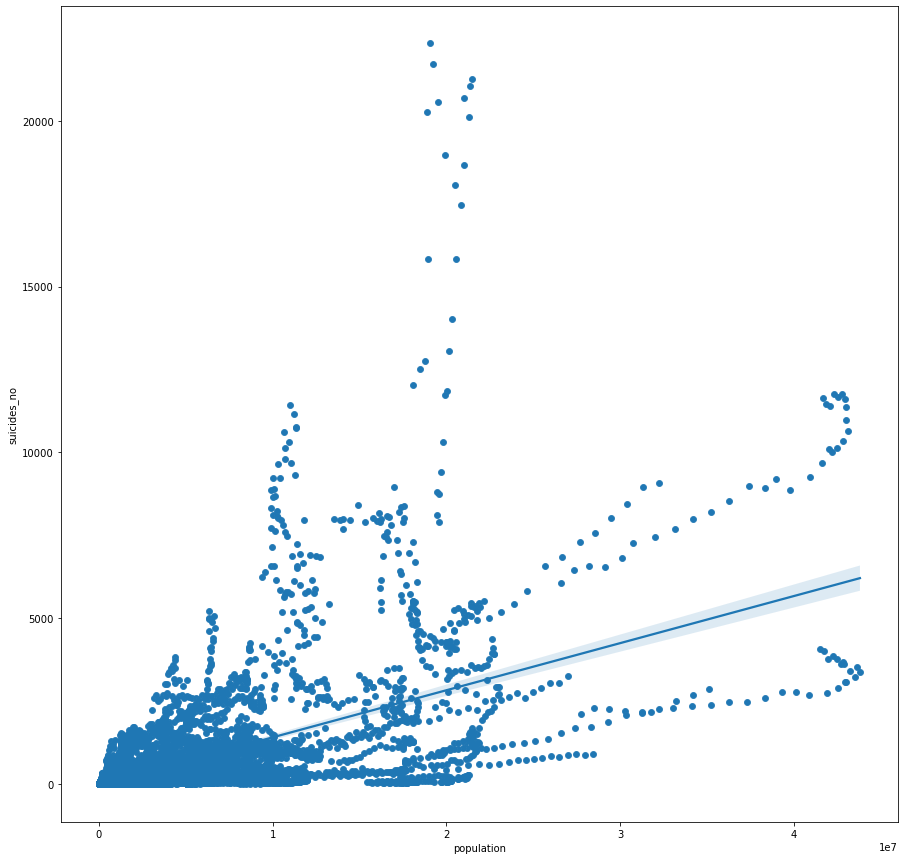

In [288]:
# Question 3
figure = plt.figure(figsize = (15,15))
sns.scatterplot(data = mydata, y = 'suicides_no', x = 'population')
sns.regplot(data = mydata, y = 'suicides_no', x = 'population')

---

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides_per_100k  gdp_for_year  gdp_per_capita       generation        GDP  
0               6.71  2.156625e+09             796     Generation X  249068400  
1               5.19  2.156625e+09             796           Silent  245168000  
2               4.83  2.156625e+09             796     Generation X  230601200  
3               4.59  2.156625e+09             796  G.I. Generation   17352800  
4               3.28  2.156625e+09             796          Boomers  218342800  


<AxesSubplot:xlabel='gdp_per_capita', ylabel='suicides_per_100k'>

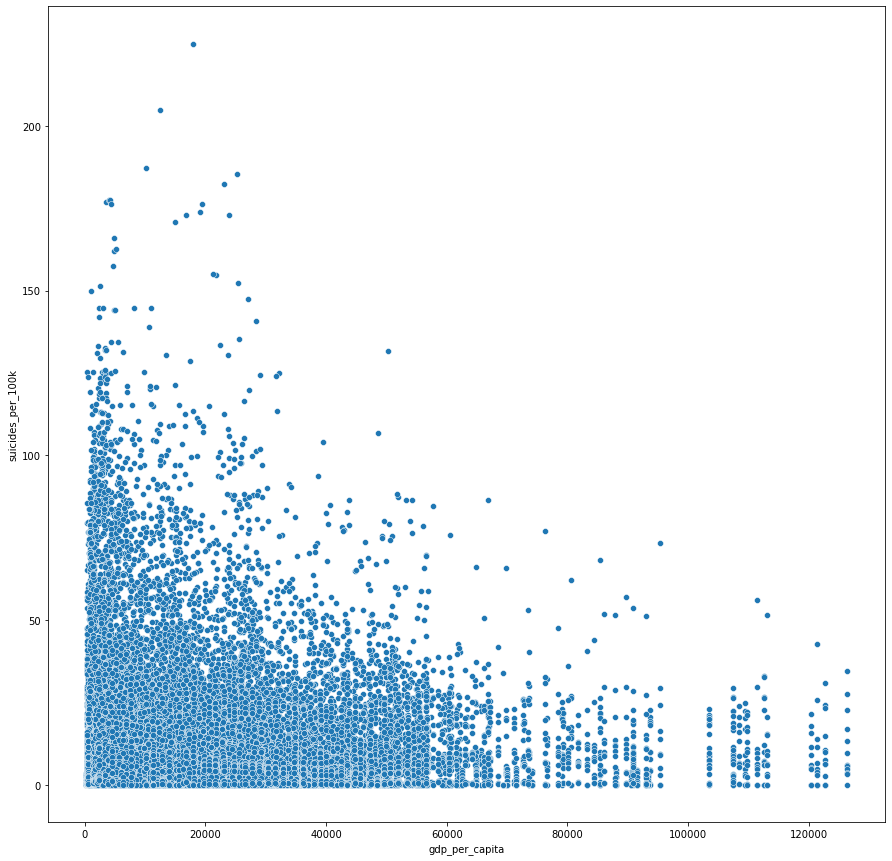

In [289]:
# Question 4
figure = plt.figure(figsize = (15,15))
mydata['GDP'] = mydata.gdp_per_capita * mydata.population
print(mydata.head())
sns.scatterplot(data = mydata, y = 'suicides_per_100k', x = 'gdp_per_capita')


---

year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
2012    11.421718
2013    11.107958
2014    11.011464
2015    11.094073
2016    13.421187
Name: suicides_per_100k, dtype: float64


<AxesSubplot:xlabel='year'>

<Figure size 1080x1080 with 0 Axes>

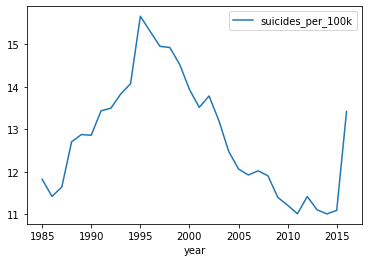

In [291]:
# Question 5
print(mydata.groupby('year')['suicides_per_100k'].mean())
mydata.groupby('year')['suicides_per_100k'].mean().to_frame().plot(kind = 'line')

<AxesSubplot:xlabel='sex'>

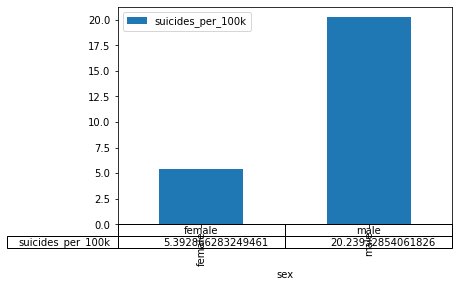

In [270]:
# Question 5
mydata.groupby('sex')['suicides_per_100k'].mean().to_frame().plot(kind = "bar", table = True)